# Метрики оценки качества моделей регрессии

## Задача регрессии

В задаче регрессии множество допустимых ответов $Y$ - это множество вещественных чисел ($Y=ℝ$). Из-за этого вероятность точного соответствия предсказанного ответа с действительным крайне мала.

Для того, чтобы оценить эффективность регрессионной модели, используются метрики, так или иначе основывающиеся на отклонении предсказанных моделью значений от действительных, т.е. на размере ошибок.

В большинстве случаев имеет смысл выбирать для модели функцию потерь, соответствующую наиболее важной с точки зрения постановки задачи метрике оценки.

Однако, в общем случае функция потерь не обязана быть такой же, как и метрика оценки, или оценка модели может проводиться с использованием нескольких метрик.

# Метрики оценки / функции потерь для моделей регрессии

## Симметричные метрики

### MAE

Одной из самых простых метрик оценки моделей регрессии является $MAE$ (mean absolute error). $MAE(y,y_{pred})=\frac{Σ_{i=1}^n|y_i-y_{pred_i}|}{n}$.

По сути, $MAE$ представляет собой среднее арифметическое ошибок для каждого предсказания.

In [97]:
import math;
import matplotlib.pyplot as plt;
import numpy as np;

In [114]:
def absolute_error(target, pred):
    return abs(target - pred);

### MSE

Метрика $MSE$ (mean squared error) очень похожа на $MAE$, но вместо абсолютного значения ошибок усредняются их квадраты.

$MSE(y,y_{pred})=\frac{Σ_{i=1}^n(y_i-y_{pred_i})^2}{n}$.

В качестве функции потерь $MSE$ полезнее, чем $MAE$, в тех случаях, когда ошибка, допустим, на 10 единиц гораздо хуже, чем ошибка на 5 единиц (более, чем в 2 раза).

В качестве метрики оценки $MSE$ не всегда удобна, т.к. единицы измерения $MSE$ не соответствуют единицам измерения предсказываемых значений. Для интуитивного понимания результата оценки удобнее использовать $RMSE$.

In [99]:
def squared_error(target, pred):
    return absolute_error(target, pred)**2;

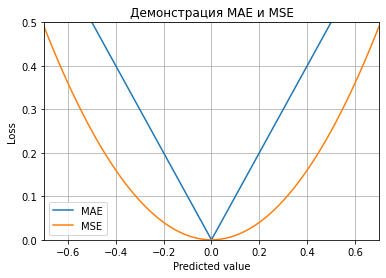

In [118]:
target = np.repeat(0, 1000);
pred = np.arange(-10,10, 0.02);

loss_mae = [absolute_error(target[i], pred[i]) for i in range(len(pred))];
loss_mse = [squared_error(target[i], pred[i]) for i in range(len(pred))];

plt.plot(pred, loss_mae, label="MAE");
plt.plot(pred, loss_mse, label="MSE");
plt.title('Демонстрация MAE и MSE');
plt.xlabel('Predicted value');
plt.ylabel('Loss');
plt.ylim(top=0.5, bottom=0);
plt.xlim(left=-0.7, right=0.7);
plt.legend();
plt.grid();
plt.show();

### RMSE

Метрика $RMSE$ (root mean squared error) - это квадратный корень из $MSE$, который берут для того, чтобы метрика оценки измерялась в тех же единицах, что и предсказываемые значения.

$RMSE=\sqrt{MSE}$.

Кстати, для многих функций потерь из фреймворка [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) есть возможность выставить параметр $squared$, чтобы получить $RMSE$ и подобные метрики.

### MedAE

$MedAE$ (median absolute error) - это устойчивая к выбросам модификация $MAE$. Вместо среднего значения ошибки используется медиана.

$MedAE(y,y_{pred})=median(|y_1-y_{pred_1}|, |y_2-y_{pred_2}|...|y_n-y_{pred_n}|)$.

### MAPE

$MAPE$ (mean absolute percentage error) - модификация $MAE$, позволяющая оценить размер ошибки в отношении к размеру предсказываемой величины.

$MAPE(y,y_{pred})=\frac{Σ_{i=1}^n\frac{|y_i-y_{pred_i}|}{max(ϵ, |y_i|)}}{n}$, где $ϵ$ - небольшая положительная величина, чтобы избежать деления на 0, если $y_i=0$.

$MAPE$ можно интерпретировать даже не будучи знакомым с предметной областью и постановкой задачи. ("результат в среднем отличается от эталона на $n$ процентов").

In [100]:
def percentage_error(target, pred):
    return absolute_error(target, pred) / max(0.001, target);

In [146]:
target = 100;
pred = round(np.random.rand() * 100);

print("Предсказанное значение (" + str(pred) + ") отличается от эталонного (" + str(target) + ") на " + str(round(percentage_error(target, pred) * 100)) + "%");

Предсказанное значение (90) отличается от эталонного (100) на 10%


## Асимметричные метрики

### Mean pinball loss

Используется для квантильной регрессии.

Квантиль - значение, которое заданная случайная величина не превышает с определенной вероятностью.

$pinball(y,y_{pred})=\frac{Σ_{i=1}^nα*max(y_i-y_{pred_i},0)+(1-α)*max(y_{pred_i}-y_i,0)}{n}$, где параметр $αϵ(0,1)$ - квантиль, который можно настраивать в зависимости от задачи.

В зависимости от параметра $α$ pinball loss может сильнее штрафовать за занижение или за превышение предсказаний.

При $α=0.5$ pinball loss эквивалентен $MSE$.

Квантильная регрессия хорошо показывает себя при работе с данными, которые распределены неравномерно, а также для проверки попадания значений в некоторый интервал.

In [103]:
def pinball_error(target, pred, quantile):
    return quantile * max(target - pred, 0) + (1 - quantile) * max(pred - target, 0);

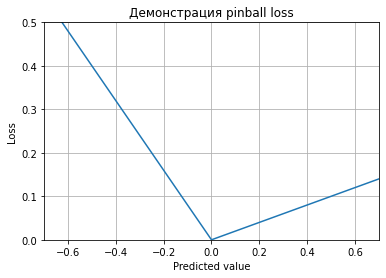

In [112]:
target = np.repeat(0, 1000);
pred = np.arange(-10,10, 0.02);

# Можно менять этот параметр в интервале от 0 до 1,
# чтобы посмотреть, как будет выглядеть график pinball loss
quantile = 0.8;

loss_pinball = [pinball_error(target[i], pred[i], quantile) for i in range(len(pred))];

plt.plot(pred, loss_pinball);
plt.title('Демонстрация pinball loss');
plt.xlabel('Predicted value');
plt.ylabel('Loss');
plt.ylim(top=0.5, bottom=0);
plt.xlim(left=-0.7, right=0.7);
plt.grid();
plt.show();

Попробуем задать распределение [Парето](https://numpy.org/doc/stable/reference/random/generated/numpy.random.pareto.html) с центром в указанной нами прямой.

Обучим квантильную модель и модель линейной регрессии с функцией потерь $MSE$ и сравним результаты предсказаний с помощью метрик $MAE$ и $MSE$.

Quantile = 0.05, MAE = 4.18, MSE = 48.96
Quantile = 0.5, MAE = 3.43, MSE = 35.86
Quantile = 0.95, MAE = 12.08, MSE = 176.57
Linear regression, MAE = 3.86, MSE = 31.5


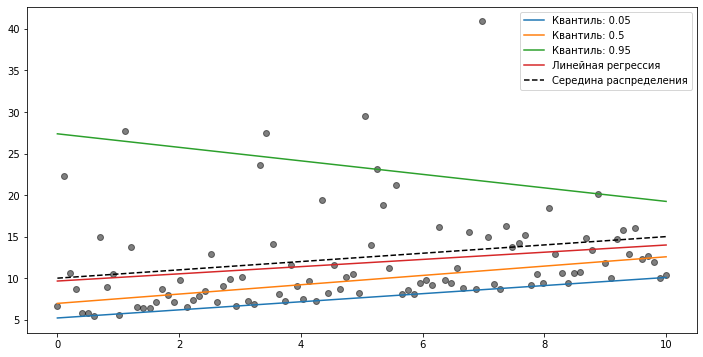

In [190]:
from sklearn.linear_model import QuantileRegressor, LinearRegression;
import sklearn.metrics as metrics;
import warnings;
warnings.filterwarnings("ignore");

plt.figure(figsize=(12, 6))

rng = np.random.RandomState(42);
x = np.linspace(0, 10, 100);
X = x[:, np.newaxis];
y_true_mean = 10 + 0.5 * x;

a = 3;
y_pareto = y_true_mean + 10 * (rng.pareto(a, size=x.shape[0]) - 1 / (a - 1));

quantiles = [0.05, 0.5, 0.95];

for quantile in quantiles:
    model = QuantileRegressor(quantile=quantile, alpha=0);
    y_pred = model.fit(X, y_pareto).predict(X);

    print("Quantile = " + str(quantile) + ", MAE = " + str(round(metrics.mean_absolute_error(y_pareto, y_pred), 2)) + ", MSE = " + str(round(metrics.mean_squared_error(y_pareto, y_pred), 2)));

    plt.plot(X, y_pred, label="Квантиль: " + str(quantile));

linear_regressor = LinearRegression();
y_pred_linear = linear_regressor.fit(X, y_pareto).predict(X);

print("Linear regression, MAE = " + str(round(metrics.mean_absolute_error(y_pareto, y_pred_linear), 2)) + ", MSE = " + str(round(metrics.mean_squared_error(y_pareto, y_pred_linear), 2)));
plt.plot(X, y_pred_linear, label="Линейная регрессия");

plt.plot(X, y_true_mean, color="black", linestyle="dashed", label="Середина распределения");
plt.scatter(x, y_pareto, color="black", alpha=0.5);
plt.legend();

Можно заметить, что модель с функцией потерь $MSE$ показывает наилучшие результаты по своей целевой метрике, а по метрике $MAE$ ее обходит квантильная модель с квантилем, равным 0.5. (Потому что в этом случае функция mean pinball loss сводится к $MAE$.

### MSLE

$MSLE$ (mean squared log error) - модификация $MSE$, хорошо показывающая себя при работе с данными, растущими экспоненциально.

$MSLE(y,y_{pred})=\frac{Σ_{i=1}^n(ln(1+y_i)-ln(1+y_{pred_i}))^2}{n}$.

Эта метрика асимметрична - она штрафует заниженные предсказания сильнее, чем завышенные.

Аналогично с $MSE$ и $RMSE$ можно использовать $RMSLE$, чтобы привести метрику к тем же единицам измерения, что и предсказываемые значения.

In [109]:
def log_error(target, pred):
    return (math.log(1 + target) - math.log(1 + pred))**2;

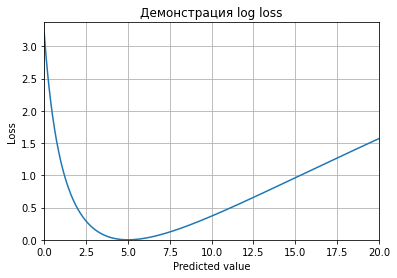

In [111]:
target = np.repeat(5, 1000);
pred = np.arange(0,20, 0.02);

loss_msle = [log_error(target[i], pred[i]) for i in range(len(pred))];

plt.plot(pred, loss_msle);
plt.title('Демонстрация log loss');
plt.xlabel('Predicted value');
plt.ylabel('Loss');
plt.ylim(bottom=0);
plt.xlim(left=0, right=20);
plt.grid();
plt.show();

# Источники

https://www.tensorflow.org/api_docs/python/tf/keras/metrics

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

https://scikit-learn.org/stable/modules/linear_model.html#quantile-regression

https://scikit-learn.org/stable/auto_examples/linear_model/plot_quantile_regression.html#sphx-glr-auto-examples-linear-model-plot-quantile-regression-py

https://colab.research.google.com/drive/1sMZx6Pv7hSWY6L2xPPpmRGNCsqKEVa4f

https://en.wikipedia.org/wiki/Quantile